In [14]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("European_citiznes_rsvp.csv")
df.head()

,COUNTRY,SEX,YEAR,life_expectancy,average_number_of_calories_available_per_person_per_day,unemployment_rate,regular_daily_smokers,adult_overweight,alcahol_consumption_liter_per_capita,fat_available_ppd,protein_ppd,average_fruit_vegtable_ppd
0,Austria,ALL,2000.0,78.47,2223.0,5.6,29.5,33.3,1.17,44.85,66.11,128.80
1,Austria,ALL,2001.0,78.95,2242.0,5.1,40.1,33.8,0.91,46.06,66.12,121.44
2,Austria,ALL,2002.0,79.01,2156.0,3.6,24.7,34.2,1.04,43.14,64.58,115.27
3,Austria,ALL,2003.0,78.89,2270.0,4.4,34.9,34.7,1.04,48.29,65.59,127.38
4,Austria,ALL,2004.0,79.43,2254.0,5.7,39.0,35.1,1.03,44.41,66.63,120.52


In [13]:
filterByYear = df[df["YEAR"]==2000]
filterByYear[["COUNTRY","YEAR","life_expectancy"]].head()

,COUNTRY,YEAR,life_expectancy
0,Austria,2000.0,78.47
22,Belgium,2000.0,77.96
43,Bulgaria,2000.0,71.71
65,Cyprus,2000.0,77.89
87,Czechia,2000.0,75.21


In [ ]:
from sklearn.cluster import KMeans

y_pred = KMeans(n_clusters=3).fit_predict(filterByYear[["YEAR","life_expectancy"]])
filterByYear["cluster"] = y_pred
filterByYear[["COUNTRY","YEAR","life_expectancy","cluster"]].head()

/home/viereck/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_2204/2715819584.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filterByYear["cluster"] = y_pred


,COUNTRY,YEAR,life_expectancy,cluster
0,Austria,2000.0,78.47,2
22,Belgium,2000.0,77.96,2
43,Bulgaria,2000.0,71.71,1
65,Cyprus,2000.0,77.89,2
87,Czechia,2000.0,75.21,0


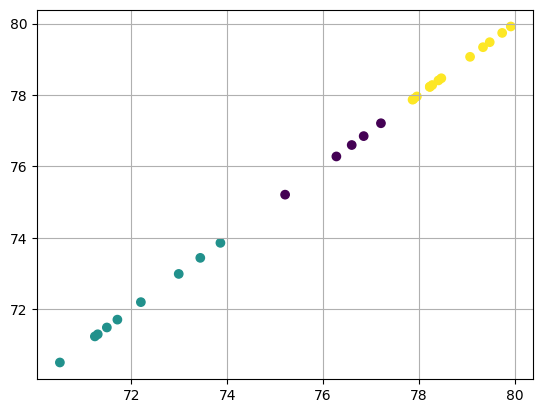

In [40]:
fig, ax = plt.subplots()
ax.scatter(filterByYear["life_expectancy"], filterByYear["life_expectancy"], c=filterByYear["cluster"])
ax.grid(True)

plt.show()